# PROJETO DE CIÊNCIA DE DADOS

#### PROFESSOR:

IVANOVITCH MEDEIROS DANTAS DA SILVA 
 
#### GRUPO: 

AILSON FORTE DOS SANTOS

ALLAN VALDIVINO GONÇALVES

CINTHIA KATIANE ARAÚJO DO NASCIMENTO

WELLIGTON MIGUEL DA SILVA

_______________________________________________________________

In [45]:
import pandas as pd
import numpy as np

# 1a ETAPA: FIRST THINGS FIRST


#### TAREFAS:

* Coleta 
* Limpeza

### 1.1 Informações dos Curriculos e Componentes

#### DATASETS UTILIZADOS

Componentes: 

http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv

Curriculos:

http://dados.ufrn.br/dataset/82aca3f1-f7ee-425e-bf1e-b6a1d6811bf4/resource/3f25d054-c5d2-4bf2-8cd4-8e0a2e4f63ce/download/curriculo-componente-graduacao.csv

### CÓDIGO

In [4]:
df_componentes = pd.read_csv('dados/componentes-curriculares-presenciais.csv',
                            error_bad_lines=False, sep=';', low_memory=False,
                            usecols=['id_componente','tipo_componente', 'codigo', 'nivel', 'nome', 'ch_total', 'equivalencia', 'pre_requisito','co_requisito'])
df_componentes.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,60,NaN,NaN,NaN
1,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,30,NaN,NaN,NaN
2,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,30,NaN,NaN,NaN
3,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,15,NaN,NaN,NaN
4,18647,DISCIPLINA,MUT167,T,PIANO COMPLEMENTAR III,15,NaN,NaN,NaN


In [5]:
df_componentes_imd = df_componentes[df_componentes.codigo.str.contains('IMD', na=False)]
df_componentes_imd.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,equivalencia,pre_requisito,co_requisito
20970,51954,MODULO,IMD0001,L,INOVAÇÃO TECNOLÓGICA,15,NaN,NaN,NaN
21229,52247,MODULO,IMD0002,L,INOVAÇÃO TECNOLÓGICA,30,NaN,NaN,NaN
21230,52248,MODULO,IMD0003,L,PROCESSO E QUALIDADE DE SOFTWARE,30,NaN,NaN,NaN
21231,52249,MODULO,IMD0004,L,GERÊNCIA DE PROJETOS,30,NaN,NaN,NaN
21371,52390,MODULO,IMD0005,L,INOVAÇÃO TECNOLÓGICA,15,NaN,NaN,NaN


In [6]:
df_curriculo = pd.read_csv('dados/curriculo-componente-graduacao.csv',
                            error_bad_lines=False, sep=';')
df_curriculo.head()

,id_curriculo_componente,id_curriculo,id_componente_curricular,semestre_oferta,tipo_vinculo_componente,nivel_ensino
0,129366,100579,23161,8,OPTATIVO,GRADUAÇÃO
1,121276,100302,25440,5,OPTATIVO,GRADUAÇÃO
2,19001074,18999000,25603,1,OBRIGATÓRIO,GRADUAÇÃO
3,116106239,107405556,41803,0,OPTATIVO,GRADUAÇÃO
4,127478,100200,22865,6,OPTATIVO,GRADUAÇÃO


In [7]:
df_curriculo.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

In [8]:
df_componentes_imd.id_componente = df_componentes_imd.id_componente.astype(np.int64)
df_curriculo.id_componente = df_curriculo.id_componente.astype(np.int64)

C:\Users\Cinthia\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
df_curriculo_componente = pd.merge(df_curriculo, df_componentes_imd, on='id_componente')
df_curriculo_componente = df_curriculo_componente.drop(['nivel', 'tipo_componente'], axis=1)
df_curriculo_componente.head()

,id_curriculo_componente,id_curriculo,id_componente,semestre_oferta,tipo_vinculo_componente,nivel_ensino,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,96348490,96335318,52682,6,OPTATIVO,GRADUAÇÃO,IMD0406,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
1,105757383,105755388,52682,0,OPTATIVO,GRADUAÇÃO,IMD0406,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
2,96338889,96338399,52682,5,OBRIGATÓRIO,GRADUAÇÃO,IMD0406,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
3,101667945,101658777,52682,0,OPTATIVO,GRADUAÇÃO,IMD0406,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
4,101668653,101668583,52682,0,OPTATIVO,GRADUAÇÃO,IMD0406,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN


_____

### 1.2 Informações dos discentes

#### DATASETS UTILIZADOS

Turmas (2015 - 2017): 

http://dados.ufrn.br/dataset/turmas

Matriculas (2015 - 2017):

http://dados.ufrn.br/dataset/matriculas-componentes

Informações Complementares dos Discentes:

http://dados.ufrn.br/dataset/80b1a8e9-2e40-4c6c-97ea-d595a3c8b8f5/resource/0e287fe5-badb-4b34-b1bf-8815db5dfbeb/download/dados-pessoais-discentes

### CÓDIGO

In [10]:
turma_periodo = ['dados/turmas-2015.1.csv','dados/turmas-2015.2.csv',
                 'dados/turmas-2016.1.csv','dados/turmas-2016.2.csv', 
                 'dados/turmas-2017.1.csv','dados/turmas-2017.2.csv',]

colunas = ['id_turma', 'codigo_turma','id_componente_curricular', 'ano','periodo', 'nivel_ensino', 'periodo','situacao_turma']

In [11]:
frames_turmas = [pd.read_csv(periodo, sep=';', usecols=colunas) for periodo in turma_periodo]

In [12]:
df_turmas = pd.concat(frames_turmas)

In [13]:
df_turmas_consolidadas = df_turmas[df_turmas.situacao_turma == 'CONSOLIDADA']
df_turmas_consolidadas.head()

,id_turma,codigo_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma
0,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA
1,1217100,01,52921,LATO SENSU,2015,1,CONSOLIDADA
2,1217101,01,52925,LATO SENSU,2015,1,CONSOLIDADA
3,1217102,01,52920,LATO SENSU,2015,1,CONSOLIDADA
4,1217102,01,52920,LATO SENSU,2015,1,CONSOLIDADA


In [14]:
df_turmas_consolidadas.id_componente_curricular = df_turmas_consolidadas.id_componente_curricular.astype(np.int64)

C:\Users\Cinthia\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
#curriculo_comum = df_curriculo_comum.id_componente.unique()
#print (curriculo_comum)

In [16]:
#df_comum = df_turmas_consolidadas.loc[df_turmas_consolidadas['id_componente_curricular'].isin(curriculo_comum)]
#df_comum.head()

In [17]:
matriculas_periodo = ['dados/matricula-2015.1.csv','dados/matricula-2015.2.csv',
                      'dados/matricula-2016.1.csv','dados/matricula-2016.2.csv',
                      'dados/matricula-2017.1.csv','dados/matricula-2017.2.csv',]

colunas_mat = ['descricao','discente','faltas_unidade','id_curso','id_turma','media_final','nota','numero_total_faltas','reposicao','unidade']

In [18]:
frames_mat = [pd.read_csv(matric, sep=';')[colunas_mat] for matric in matriculas_periodo]

In [19]:
df_matriculas = pd.concat(frames_mat, sort=True)

In [20]:
df_matriculas.head()

,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,REPROVADO,8833c0e056f90497742882bfcc81b685,0.0,100300443.0,57562481,0.0,0.0,0.0,f,2.0
1,REPROVADO,8833c0e056f90497742882bfcc81b685,0.0,100300443.0,57562481,0.0,0.0,0.0,f,3.0
2,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,1.0
3,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,2.0
4,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,3.0


In [21]:
df_turma_matricula = pd.merge(df_turmas_consolidadas, df_matriculas, on='id_turma')
df_turma_matricula.head()

,id_turma,codigo_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma,descricao,discente,faltas_unidade,id_curso,media_final,nota,numero_total_faltas,reposicao,unidade
0,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA,DESISTENCIA,50b4ff86ad190e4ec463dba97ae745a8,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
1,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA,DESISTENCIA,7f23d4bef06eb93381d3bd02494d1ee6,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
2,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA,DESISTENCIA,444be6838e9d059cfe83ec0def0f7431,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
3,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,1.0
4,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,2.0


In [22]:
colunas_remover = ['codigo_turma', 'nivel_ensino', 'situacao_turma']
df_turma_matricula = df_turma_matricula.drop(colunas_remover, axis=1)

In [23]:
df_turma_matricula.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

df_turma_matricula.head()

,id_turma,id_componente,ano,periodo,descricao,discente,faltas_unidade,id_curso,media_final,nota,numero_total_faltas,reposicao,unidade
0,1217099,52922,2015,1,DESISTENCIA,50b4ff86ad190e4ec463dba97ae745a8,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
1,1217099,52922,2015,1,DESISTENCIA,7f23d4bef06eb93381d3bd02494d1ee6,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
2,1217099,52922,2015,1,DESISTENCIA,444be6838e9d059cfe83ec0def0f7431,NaN,95825620.0,NaN,NaN,NaN,NaN,NaN
3,1217099,52922,2015,1,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,1.0
4,1217099,52922,2015,1,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,2.0


In [24]:
df_tm = df_turma_matricula.loc[~df_turma_matricula['descricao'].isin(['INDEFERIDO', 'CANCELADO', 'EXCLUIDA', 'DESISTENCIA'])]
df_tm.sort_values('unidade').drop_duplicates(subset=['id_turma', 'discente'], keep='last')

df_tm.head()

,id_turma,id_componente,ano,periodo,descricao,discente,faltas_unidade,id_curso,media_final,nota,numero_total_faltas,reposicao,unidade
3,1217099,52922,2015,1,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,1.0
4,1217099,52922,2015,1,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,2.0
5,1217099,52922,2015,1,APROVADO,5fdb41574051227d9a77537dd13325b4,0.0,95825620.0,8.0,8.0,3.0,f,3.0
6,1217099,52922,2015,1,APROVADO,bd49325f27c692cf3503c55fc0e89c4d,0.0,95825620.0,9.0,9.0,0.0,f,1.0
7,1217099,52922,2015,1,APROVADO,bd49325f27c692cf3503c55fc0e89c4d,0.0,95825620.0,9.0,9.0,0.0,f,2.0


In [25]:
df_info_complementar = pd.read_csv('http://dados.ufrn.br/dataset/80b1a8e9-2e40-4c6c-97ea-d595a3c8b8f5/resource/0e287fe5-badb-4b34-b1bf-8815db5dfbeb/download/dados-pessoais-discentes',
sep=';')
df_info_complementar.rename(columns={'id_discente': 'discente'}, inplace=True)

df_info_complementar.head()

,discente,sexo,data_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista
0,0e356f33d9f25c70bd7b98ef1bd1ecd4,M,03-10-1943,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,VESTIBULAR,1969,1.0,f
1,a3f7753971d7ca9c1648616b1f7e4c48,M,21-02-1949,Não Informado,Rio de Janeiro,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
2,d29e0a56e3cc973750e2d2cbabedc449,F,09-09-1947,Não Informado,NaN,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
3,d4f89fe5c6dd43692b3c1fc4ce324fd5,M,22-04-1949,Não Informado,Rio Grande do Norte,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
4,e2f244371122aea4140427ada6f391b4,M,21-03-1944,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,ALECRIM,GRADUAÇÃO,VESTIBULAR,1970,1.0,f


In [26]:
df_info = pd.merge(df_tm, df_info_complementar, on='discente')
df_info = df_info.drop(['nivel_ensino','ano_ingresso', 'periodo_ingresso'], axis=1)
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8873318 entries, 0 to 8873317
Data columns (total 23 columns):
id_turma               int64
id_componente          int64
ano                    int64
periodo                int64
descricao              object
discente               object
faltas_unidade         float64
id_curso               float64
media_final            float64
nota                   float64
numero_total_faltas    float64
reposicao              object
unidade                float64
sexo                   object
data_nascimento        object
raca                   object
estado_origem          object
cidade_origem          object
estado                 object
municipio              object
bairro                 object
forma_ingresso         object
cotista                object
dtypes: float64(6), int64(4), object(13)
memory usage: 1.6+ GB


In [27]:
df_geral = pd.merge(df_info, df_curriculo_componente, on='id_componente')
df_geral.head()

,id_turma,id_componente,ano,periodo,descricao,discente,faltas_unidade,id_curso,media_final,nota,...,id_curriculo,semestre_oferta,tipo_vinculo_componente,nivel_ensino,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,0.0,92127264.0,6.9,6.9,...,101669220,1,OBRIGATÓRIO,GRADUAÇÃO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
1,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,0.0,92127264.0,6.9,6.9,...,101668583,1,OBRIGATÓRIO,GRADUAÇÃO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
2,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,0.0,92127264.0,6.9,6.9,...,102359682,1,OBRIGATÓRIO,GRADUAÇÃO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
3,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,0.0,92127264.0,6.9,6.9,...,102200805,1,OBRIGATÓRIO,GRADUAÇÃO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
4,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,0.0,92127264.0,6.9,6.9,...,105694093,1,OBRIGATÓRIO,GRADUAÇÃO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN


In [46]:
colunas = ['nota','nivel_ensino', 'forma_ingresso', 'faltas_unidade','numero_total_faltas','reposicao','unidade']
df_geral = df_geral.drop(colunas, axis=1)
df_geral.head()

KeyError: "labels ['nota' 'nivel_ensino' 'forma_ingresso' 'faltas_unidade'\n 'numero_total_faltas' 'reposicao' 'unidade'] not contained in axis"

___________

##### ANÁLISE

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [30]:
df_geral.cotista.value_counts()

f    279741
t    174292
Name: cotista, dtype: int64

In [31]:
df_geral.descricao.value_counts()

APROVADO POR NOTA                   156663
APROVADO                            127569
REPROVADO                            87620
REPROVADO POR MÉDIA E POR FALTAS     65960
TRANCADO                             14886
REPROVADO POR NOTA                     846
REPROVADO POR FALTAS                   357
REPROVADO POR NOTA E FALTA             132
Name: descricao, dtype: int64

In [32]:
cotistas = df_geral[df_geral.cotista == 't']
n_cotista = df_geral[df_geral.cotista == 'f']

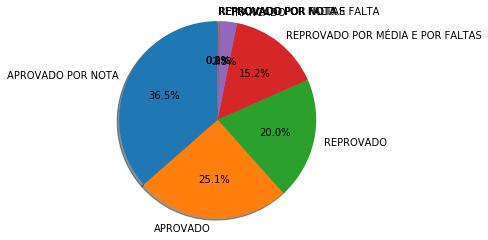

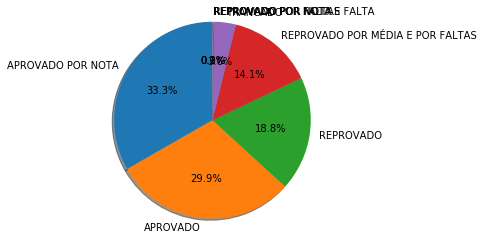

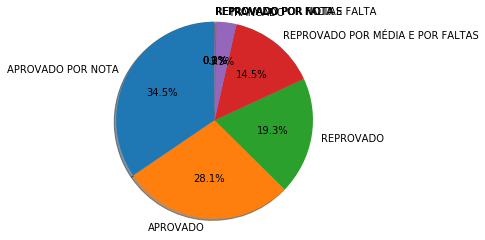

In [47]:
#Cotista
n_sizes = 100. * cotistas.descricao.value_counts(normalize=True) 
labels = n_sizes.index
sizes = n_sizes.values

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#Não cotista
n_sizes = 100. * n_cotista.descricao.value_counts(normalize=True) 
labels = n_sizes.index
sizes = n_sizes.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#Geral
n_sizes = 100. * df_geral.descricao.value_counts(normalize=True) 
labels = n_sizes.index
sizes = n_sizes.values

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

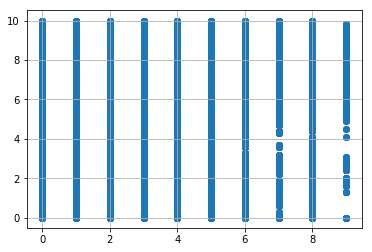

In [44]:
#Não entendi o que esse gráfico significa
fig, ax = plt.subplots()

x = df_geral.semestre_oferta    
y = df_geral.media_final
ax.scatter(x, y)

ax.grid(True)

plt.show()

['RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI'
 'PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I'
 'PRÁTICAS DE LEITURA EM INGLÊS' 'TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE'
 'CÁLCULO DIFERENCIAL E INTEGRAL I'
 'PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II'
 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I' 'VETORES E GEOMETRIA ANALÍTICA'
 'LEVANTAMENTO E MODELAGEM DE REQUISITOS' 'LINGUAGEM DE PROGRAMAÇÃO I'
 'ESTRUTURA DE DADOS BÁSICAS I' 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II'
 'INTRODUÇÃO A ORGANIZAÇÃO E ARQUITETURA DE COMPUTADORES'
 'FUNDAMENTOS PEDAGÓGICOS PARA A INFORMÁTICA EDUCACIONAL I'
 'ESTRUTURAS DE DADOS BÁSICAS II' 'LINGUAGEM DE PROGRAMAÇÃO II'
 'PROBABILIDADE' 'JOGOS DIGITAIS COMO FERRAMENTA PEDAGÓGICA'
 'FUNDAMENTOS DE JOGOS DIGITAIS' 'MECÂNICAS E BALANCEAMENTO DE JOGOS'
 'PRÁTICAS DE LEITURA E ESCRITA EM INGLÊS' 'SISTEMAS OPERACIONAIS'
 'REDES DE COMPUTADORES'
 'PRINCÍPIOS DE LEGISLAÇÃO APLICÁVEIS À TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO DE DADOS'
 'PROJETO DE INOVAÇÃO TECNOLÓGICA'

ValueError: could not convert string to float: 'PROJETO INTEGRADO III'

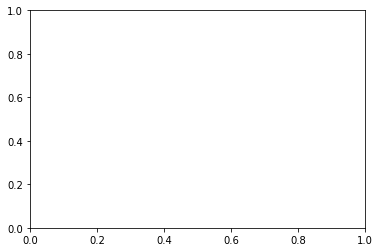

In [52]:
disciplinas = df_geral.nome.unique()
print (disciplinas)
for disciplina in disciplinas:
    info_disciplina = df_geral.loc[df_geral['nome'] == disciplina]
    g = sn.kdeplot(df_geral["nome"], (df_geral["descricao"]=='REPROVADO').sum())
    sns.despine(left=True, bottom=True)
    plt.show()

____

In [55]:
df_geral.head()

,id_turma,id_componente,ano,periodo,descricao,discente,id_curso,media_final,sexo,data_nascimento,...,id_curriculo_componente,id_curriculo,semestre_oferta,tipo_vinculo_componente,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101669223,101669220,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
1,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101668586,101668583,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
2,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,102359686,102359682,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
3,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,102200808,102200805,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
4,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,105694132,105694093,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN


In [58]:
df_grade = df_geral[df_geral.id_curriculo == 101658777]
df_grade_obrg = df_grade[df_grade.tipo_vinculo_componente == 'OBRIGATÓRIO']

df_grade.pre_requisito = df_grade.pre_requisito.str.replace('(', '')
df_grade.pre_requisito = df_grade.pre_requisito.str.replace(')', '')
df_grade.pre_requisito = df_grade.pre_requisito.str.replace(' ', '')

df_grade

C:\Users\Cinthia\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,id_turma,id_componente,ano,periodo,descricao,discente,id_curso,media_final,sexo,data_nascimento,...,id_curriculo_componente,id_curriculo,semestre_oferta,tipo_vinculo_componente,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
7,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
16,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
25,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
34,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
43,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
52,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
61,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
70,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
79,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
88,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,M,21-01-1995,...,101659805,101658777,1,OBRIGATÓRIO,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN


In [59]:
de = []
para = []
links = {'from': de, 'to': para}
ids = []
groups = []
car = {'ID': ids, 'myvalue': groups}
pos = {}
ch = {1: [1,2,3,4], 2: [1,2,3,4,5], 3:[1,2,3,4], 4:[1,2]}

In [61]:
for _, row in df_grade_comum.iterrows():
    ids.append(row.codigo)
    pos[row.codigo] = (row.semestre_oferta, ch[row.semestre_oferta].pop())

    if (str(row.pre_requisito).lower()!='nan'):
        de.append(row.pre_requisito)
        para.append(row.codigo)
        groups.append('group1')
    else:
        de.append(row.codigo)
        para.append(row.codigo)
        groups.append('group2')
        pass
    
# Build a dataframe with your connections
df = pd.DataFrame(links)
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame(car)
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', edge_attr=True)
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes

plt.rcParams['figure.figsize'] = (16,7)
# Custom the nodes:
nx.draw(G, pos, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500, edge_color='lightgrey', width=10.0)

ValueError: arrays must all be same length

____

# O passo final é atribuir peso aos nodes com base nas métricas 